In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
df=pd.read_csv('data.csv')#download this dataset from https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [3]:
# Extract the change in blood pressure
change_in_pressure = df[' Blood Pressure After (mmHg)'] - df[' Blood Pressure Before (mmHg)']

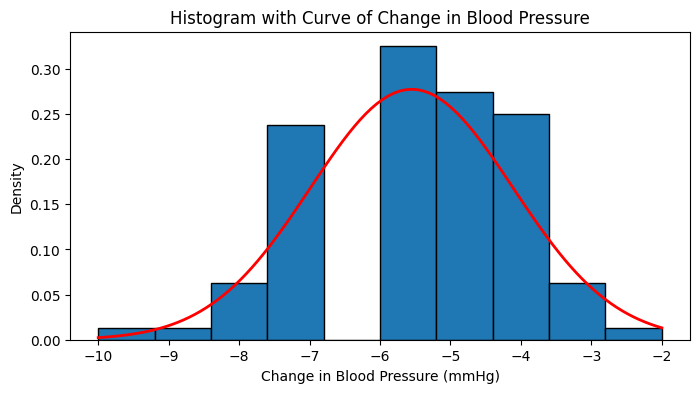

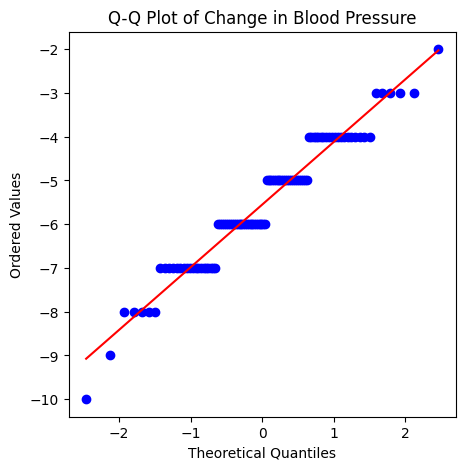

In [4]:

# Plot histogram with curve
plt.figure(figsize=(8, 4))
plt.hist(change_in_pressure, bins=10, edgecolor='black', density=True)
plt.xlabel('Change in Blood Pressure (mmHg)')
plt.ylabel('Density')
plt.title('Histogram with Curve of Change in Blood Pressure')

# Generate range for x values
x = np.linspace(change_in_pressure.min(), change_in_pressure.max(), 100)

# Calculate mean and standard deviation
mean = np.mean(change_in_pressure)
std = np.std(change_in_pressure)

# Plot the curve (normal distribution)
curve = stats.norm.pdf(x, mean, std)
plt.plot(x, curve, 'r-', linewidth=2)
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(5, 5))
stats.probplot(change_in_pressure, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Change in Blood Pressure')
plt.show()


**`Even though it seems to be close to normally distributed from the visuals, we cant take that as conclusion. Lets perform some other tests for confirmation. `**

In [5]:
# Perform Shapiro-Wilk test for normality
p_value = stats.shapiro(change_in_pressure)[1]

# Check the significance level
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("The change in blood pressure follows a normal distribution.")
else:
    print("The change in blood pressure does not follow a normal distribution.")


The change in blood pressure does not follow a normal distribution.


In [6]:
# Perform Anderson-Darling test for normality
result = stats.anderson(change_in_pressure)

# Extract the test statistic and critical values
test_statistic = result.statistic
critical_values = result.critical_values

# Compare the test statistic with the critical values
alpha = 0.05
is_normal = test_statistic < critical_values[2]

# Interpret the result
if is_normal:
    print("The change in blood pressure follows a normal distribution.")
else:
    print("The change in blood pressure does not follow a normal distribution.")


The change in blood pressure does not follow a normal distribution.


**From the two tests (Shapiro-wilk test and Anderson-Darling Test) performed above, we can confirm that the change in BP doesnt follow normal distribution.**